# Import Libraries and Data

In [1]:
import pandas as pd # dataframe/data cleaning/manipulation
import numpy as np # array computations
from matplotlib import pyplot as plt # plotting/graphing
import matplotlib.patches as mpatches
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text # Decision tree algorithm and plotting functions for the Decision tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay # accuracy and confusion matrix accuracy and display functions
from sklearn.model_selection import cross_val_score # cross validation accuracy function

Note: If you are using Google Colab, you must upload the training and testing CSVs from Canvas by doing the following:

* On the left-side bar, click the folder icon.
* Click the 'Upload to session storage' button.
* Upload the two CSV files; they will appear below the 'sample_data' folder.

**Unfortunately, this process must be done every time the runtime is disconnected - just a quirk with Google Colab.**

If you are using Jupyter notebook, just make sure the training and testings CSV files are in the same folder location as this .ipynb file.

In [2]:
training_df = pd.read_csv('training_data.csv',index_col=0)
testing_df = pd.read_csv('testing_data.csv',index_col=0)

# Instructions and Workspace

**For this Instapoll assignment, your task is to compare two different decision tree models based on 10-Fold Cross Validation Classification Training Accuracy and on a Cost-Sensitive Evaluation using the same British Bank Dataset!**

Please try your best and if you have any questions, please reach out to the Professor or TA!


**To begin, please create `X_train`, `y_train`, `X_test`, and `y_test` variables.**

- **Hint:** Use of the `train_test_split()` function is NOT required as we have a training and testing dataframe objects.

In [5]:
X_train = training_df.drop(columns=['pep'])
y_train = training_df.pep
X_test = testing_df.drop(columns=['pep'])
y_test = testing_df.pep

**Next, create and fit two decision tree models called `model_A` and `model_B` on the training data.**

- `model_A` should have a minimum of two records per leaf and `model_B` should have a minimum of seven records per leaf.
- Both models should be set to `criterion = entropy` and `random_state = 3`.


In [6]:
model_A = DecisionTreeClassifier(min_samples_leaf = 2, criterion = 'entropy', random_state = 3).fit(X_train, y_train)
model_B = DecisionTreeClassifier(min_samples_leaf = 7, criterion = 'entropy', random_state = 3).fit(X_train, y_train)

**Now, you are ready to compare the two models using 10-Fold Cross Validation Classification Training Accuracy! Please complete the code below. Based on the results thus far, which model performs better?**

In [13]:
scoresA = cross_val_score(model_A, X_train, y_train, cv = 10).mean()
scoresB = cross_val_score(model_B, X_train, y_train, cv = 10).mean()

print('Model A 10-Fold Cross Validation Accuracy:', round(scoresA*100,2),'%')
print('Model B 10-Fold Cross Validation Accuracy:', round(scoresB*100,2),'%')

Model A 10-Fold Cross Validation Accuracy: 85.33 %
Model B 10-Fold Cross Validation Accuracy: 85.83 %


Model B has a slightly better testing accuracy. This may indicate that 2 is too few records per leaf and that model A is overfitting.

**Next is the cost-sensitive evaluation which requires the use of a confusion matrix! To start, create two objects, `predictionsA` and `predictionsB`, storing the predictions models A and B respectively made for the target variable based on the features in the testing data.**

In [14]:
predictionsA = model_A.predict(X_test)
predictionsB = model_B.predict(X_test)

**Using the `confusion_matrix`, `ConfusionMatrixDisplay`, and matplotlib plotting functions, please create and display the confusion matrix for Model A.**

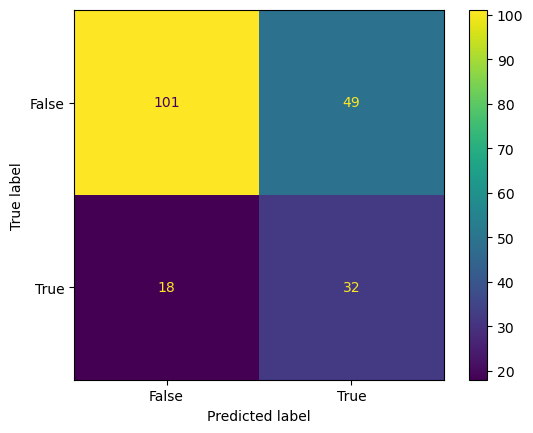

In [15]:
conf_matrixA = confusion_matrix(y_test, predictionsA)

dispA = ConfusionMatrixDisplay(confusion_matrix = conf_matrixA, display_labels = model_A.classes_)
dispA.plot()
plt.show()

**Please create and display the confusion matrix for Model B.**

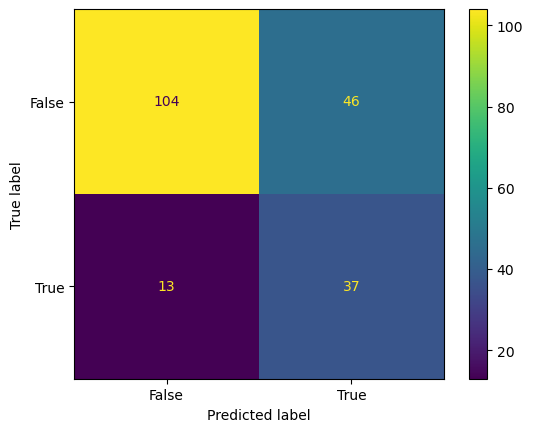

In [16]:
conf_matrixB = confusion_matrix(y_test, predictionsB)

dispB = ConfusionMatrixDisplay(confusion_matrix = conf_matrixB, display_labels = model_B.classes_)
dispB.plot()
plt.show()

**Now, assume that false postive errors are 10 times more costly than false negative errors. How much cost does Model A incur from errors?**

- **Hint:** To pull the true negative, false positive, false negative, and true positive values, use the [.ravel()](https://www.geeksforgeeks.org/numpy-ravel-python/) function on your confusion matrix variable!

In [11]:
tnA, fpA, fnA, tpA = conf_matrixA.ravel()

fp_cost = 10
fn_cost = 1

model_A_cost = fp_cost*fpA + fn_cost*fnA
print('Model A incurs $', model_A_cost, 'from errors')

Model A incurs $ 508 from errors


**How much cost does Model B incur from errors?**

In [12]:
tnB, fpB, fnB, tpB = conf_matrixB.ravel()

model_B_cost = fp_cost*fpB + fn_cost*fnB
print('Model B costs $', model_B_cost, 'from errors')

Model B costs $ 473 from errors


**Based on the results from Model A and Model B, which model should be preferred for deployment and why?**

Model B should be preferred for deployment. With unweighted errors, model B has a higher out-of-sample accuracy than model A, likely due to overfitting. More importantly though, once costs associated with different types of errors are factored in, model B is shown to have lower expected costs from errors, mostly due to minimizing false positive errors.